## Solving the repressilator model

#### Import the usual, plus scipy package for solving initial value problems

In [1]:
import matplotlib.pylab as plt   # That gives plotting, and the next line makes plots appear inline in notebook
%matplotlib inline  
import numpy as np  # That gives numerical arrays and tools for manipulating them

import scipy.optimize as opt
import scipy.linalg as la
import scipy.integrate as int


### Defining the ODE.  


In [2]:
 def repressilator_odefun(t,x,alpha,alpha0,beta,n):
    m1=x[0] 
    m2=x[1]
    m3=x[2] 
    p1=x[3]
    p2=x[4]
    p3=x[5]
    
    dm1dt=-m1 + alpha/(1.+p3**n)+ alpha0;
    dm2dt=-m2 + alpha/(1.+p1**n)+ alpha0;
    dm3dt=-m3 + alpha/(1.+p2**n)+ alpha0;

    dp1dt=-beta*(p1-m1) 
    dp2dt=-beta*(p2-m2) 
    dp3dt=-beta*(p3-m3) 

    return np.array([dm1dt,dm2dt,dm3dt,dp1dt,dp2dt,dp3dt])

In [3]:
#Define params and test the function out!

alpha=0
alpha0=0.5
beta=1
n=2

x0=np.array([1,1,1,1,1,1])
t=0
print(repressilator_odefun(t,x0,alpha,alpha0,beta,n))

[-0.5 -0.5 -0.5  0.   0.   0. ]


### Solving the ODE via scipy integrate module, which we imported above

We pass a time range, initial condition, and evaluation time list into solve_ivp as follows.  That's just as in the tutorial.  Here, we additionally pass parameters as args (in order).

In [4]:
#specify trange, a time range for simulation: two element array
tstart=0
tend=100
trange=np.array([tstart,tend])

#specify tlist,  a list of time points at which want to return the solution
numt=500
tlist=np.linspace(tstart,tend,numt)

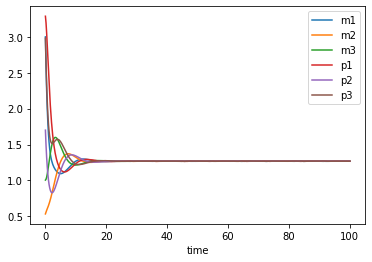

In [6]:
#Define paramaters
alpha=2
alpha0=0.5
beta=1
n=2

#Define initial condition, at random 
rng = np.random.default_rng()
x0=rng.uniform(0,4,6)

sol=int.solve_ivp(repressilator_odefun, trange, x0, t_eval=tlist,args=(alpha,alpha0,beta,n))

plt.plot(sol.t,sol.y[0,:],label='m1')
plt.plot(sol.t,sol.y[1,:],label='m2')
plt.plot(sol.t,sol.y[2,:],label='m3')
plt.plot(sol.t,sol.y[3,:],label='p1')
plt.plot(sol.t,sol.y[4,:],label='p2')
plt.plot(sol.t,sol.y[5,:],label='p3')
plt.xlabel('time')
plt.legend()

#use to zoom in if needed
#plt.xlim(80,100)
#plt.ylim(0,3)

#### Visualize in (a 2-D projection of) state space

Text(0, 0.5, 'm2')

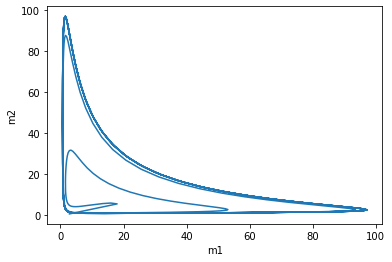

In [10]:
plt.plot(sol.y[0,:],sol.y[1,:])
plt.xlabel('m1')
plt.ylabel('m2')